In [2]:
# function to read fastq files and list out sequences and qualities
def readfastq(file):
    sequences=[]
    qualities=[]
    with open(file) as fh:
        while True:
            fh.readline() #Ignore first line
            seq=fh.readline().rstrip()
            fh.readline() #Ignore third line
            qual=fh.readline().rstrip()
            if len(seq)==0: #If we have reached the end of the file and there are no more sequecnes to read, we will leave
                break
            sequences.append(seq) # else if they are non zero, we would append to our sequences and qualities lists
            qualities.append(qual)
    return sequences, qualities

seqs,quals=readfastq('seq_reads3.fastq')
quals[:10]
#qual[:100]           

["#%#&))(/0-43:08$(&$$%%&$*%$'%&#+.12905670100%%%&'&$$%%&&&)+)*).+)7--79//2<7736/-+=;@91'+),C@C=?>7:6;-':9>?;=6D.1'%-+)2#''$'%0(&$#6-2)&''%&<<:15122:6:?A<8-//<7;/0)$,.-5'*&&92..2=@<))-<8=?/(+;;364A/-;//(.==5&%)&2(&&%$&&&%",
 "$&'*'%...//:7))#$)*&(&(.,$'-)./0('+%$(&*,%%&.'&+'-%-.-('%&&(($+01,-$)2/%%%%$*'/53<6<;3(,-*+?149><5&'+/..($$%+%%%#%'.,1;66((,*+*+#%$''&'(,%,<>?@96:;BACJ3A+484+$$$+##&&'(+'%.',*&$&0**$+&-*.$#-.7-6%/&:060,,",
 "*$(*&%%%$)1/2?+-$-%*)%%&%$''&)+)'(*$'%'$&&%&&+,+3+8;:66641)*'('*,-$(+((..)69:17$'),%##%'$%%*)'(#&%(1357/.*-?=A:%'.=A..+((1569.28141.=3();A@?1>;=>F2+5@31+1/1059*.-0*&(.-+,%-$-451?.11*&',$+++45-.(/2%%%>@AA5-2;A88)-'5792)(",
 "$%%)./286;*-&+*+)-#$$$$''(&$(+-&%&*$$&'%$&###$#$&$%&#'&*)*6%%$($$$&%$'%%%('05546(-37?>@=<310)*$20).112-+*,,),-&,60.$+($&$)#$&(1:>E885$'+//91<=<=QKH14+,91,.((2)4>@<;<=9<>@>;245//7.32108-&%%/24.6$+13-.&%$$1,.5248*&'3-:23(,$&&-#$$",
 '&#&&%&&&234:6=>8<+12,*,&(%*--$\'=743-%%&((&%$\'\'$&"$$$$$%#\'1:::.0);<=83--,*.,0+77834&+51&%%%)\'\'\'%&\'$&%*9

In [7]:
# function to convert phred33 ASCII to q value
def phred33toQ(qual):
    return ord(qual)-33 #'ord' function converts character to ASCII value

In [18]:
phred33toQ('$')

3

In [52]:
# to create a histogram of quality scores 

def createHist(qualities):
    hist=[0]*70
    for qual in qualities: # for each qual in the list of qualities
        for phred in qual: #for each symbol in the qual 
            q=phred33toQ(phred)
            hist[q]+=1
    return hist
h=createHist(quals)
print(h)

[0, 2764, 48648, 117925, 117027, 97324, 82482, 72258, 64750, 58973, 54665, 51357, 48283, 45575, 42559, 40839, 38848, 37229, 35551, 34049, 32625, 31205, 29629, 28170, 26378, 24822, 22880, 20624, 18320, 16117, 13451, 11319, 8839, 6950, 5269, 3890, 2803, 1888, 1285, 864, 599, 442, 319, 247, 159, 96, 68, 45, 26, 15, 21, 11, 2, 2, 4, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


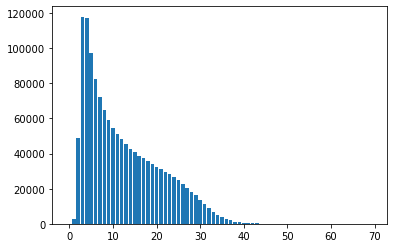

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

The histogram shows high counts at low q values, indicating higher probability of errors in sequencing. 

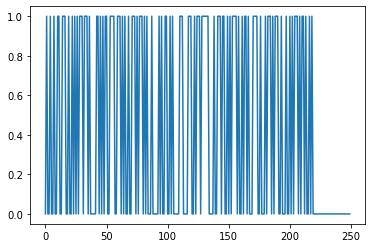

In [54]:
#to check GC content in the sequencing reads. GC content varies from species
#to species. So we should not see huge fluctuations in gc content

def findGCByPos(reads):
    gc=[0]*250 # since each read is a 100 long, lets make an empty array with size 100
    total=[0]*250
    for read in reads:
        for i in range(len(read)):
            if read[i]=='G' or read[i]=='C':
                gc[i]+=1
            total[i]+=1 #regardless of g or c, update total to keep track of total bases
        for i in range(len(gc)):
            if total[i]>0:
                gc[i]/=total[i]
        return gc
    
gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()


GC content shows high fluctuations between 0 and 1. This indicates that the sequencing reads may not be from the same reference genome

In [55]:
#distribution of bases in these sequences
import collections
count=collections.Counter()
for each in seqs:
    count.update(each)
print(count)

Counter({'T': 399485, 'G': 356005, 'A': 324678, 'C': 320327})


In [50]:
(count['G']+count['C'])/(count['T']+count['A']+count['G']+count['C'])

0.482923537749153